In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importing the data
This data is from Suraj Jha on Kaggle: https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data

In [2]:
stores = pd.read_csv('stores.csv')

## Initial data exploration

In [4]:
print(stores.head())

   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620


In [5]:
print(stores.columns)

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')


## Data cleaning

In [26]:
stores.rename(columns={"Store ID ": "Store_ID"}, inplace = True)
# Renamed Store_ID column:
# - Removed space at the end.
# - Replaced middle space with underscore for consistency.

In [28]:
stores.set_index("Store_ID")
# Set the Store_ID column as the index.

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620
...,...,...,...,...
892,1582,1910,1080,66390
893,1387,1663,850,82080
894,1200,1436,1060,76440


## Exploratory Analysis

### Univariate Analysis

(array([ 10.,  28.,  99., 130., 218., 180., 124.,  76.,  28.,   3.]),
 array([ 775. ,  920.4, 1065.8, 1211.2, 1356.6, 1502. , 1647.4, 1792.8,
        1938.2, 2083.6, 2229. ]),
 <BarContainer object of 10 artists>)

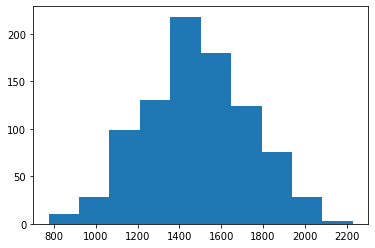

In [31]:
plt.hist(stores.Store_Area)

(array([  9.,  29.,  91., 137., 216., 183., 121.,  75.,  32.,   3.]),
 array([ 932. , 1105.5, 1279. , 1452.5, 1626. , 1799.5, 1973. , 2146.5,
        2320. , 2493.5, 2667. ]),
 <BarContainer object of 10 artists>)

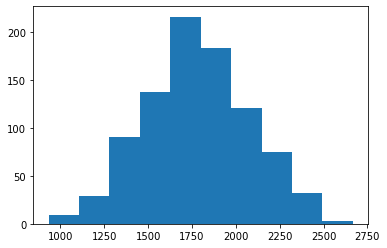

In [32]:
plt.hist(stores.Items_Available)

(array([  7.,  21.,  81., 144., 202., 183., 145.,  74.,  30.,   9.]),
 array([  10.,  165.,  320.,  475.,  630.,  785.,  940., 1095., 1250.,
        1405., 1560.]),
 <BarContainer object of 10 artists>)

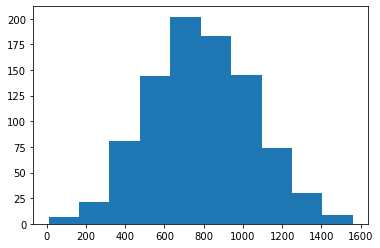

In [33]:
plt.hist(stores.Daily_Customer_Count)

(array([ 13.,  45., 146., 188., 173., 157., 116.,  44.,  13.,   1.]),
 array([ 14920.,  25060.,  35200.,  45340.,  55480.,  65620.,  75760.,
         85900.,  96040., 106180., 116320.]),
 <BarContainer object of 10 artists>)

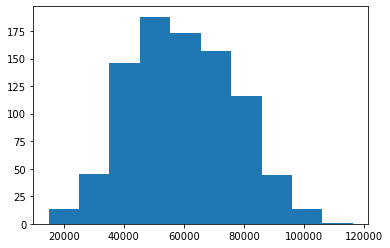

In [34]:
plt.hist(stores.Store_Sales)

All variables appear roughly normally distributed.

### Bivariate Analysis

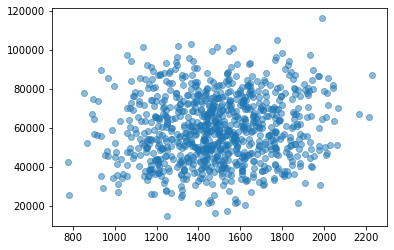

In [35]:
plt.scatter(stores.Store_Area, stores.Store_Sales, alpha = 0.5)

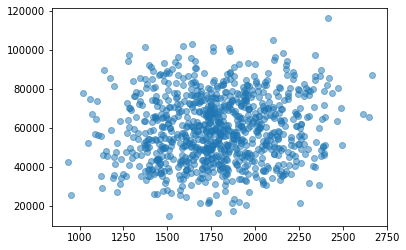

In [36]:
plt.scatter(stores.Items_Available, stores.Store_Sales, alpha = 0.5)

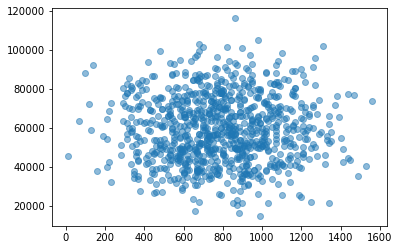

In [37]:
plt.scatter(stores.Daily_Customer_Count, stores.Store_Sales, alpha = 0.5)

Interestingly, it doesn't look like any of the other variables are correlated with Store_Sales.

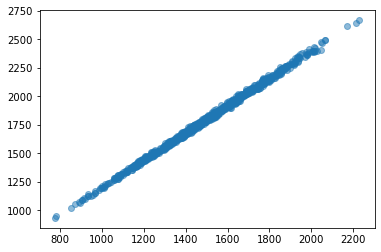

In [38]:
plt.scatter(stores.Store_Area, stores.Items_Available, alpha = 0.5)

Store area and items available have a strong linear correlation.

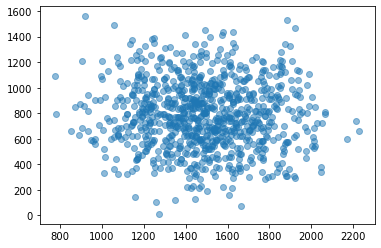

In [40]:
plt.scatter(stores.Store_Area, stores.Daily_Customer_Count, alpha = 0.5)

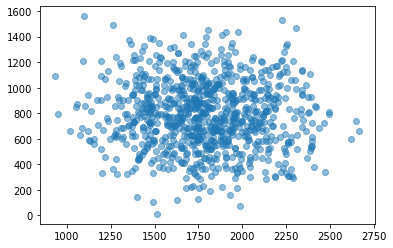

In [41]:
plt.scatter(stores.Items_Available, stores.Daily_Customer_Count, alpha = 0.5)

No correlations found with Daily_Customer_Count.

## Modeling Items_Available

### Splitting training and testing data

In [48]:
x = stores[['Store_Area']]
y = stores.Items_Available
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

### Creating and training a linear regression model

In [49]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9974982741341932

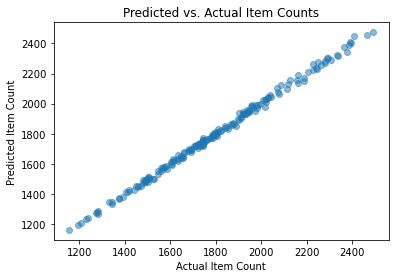

In [61]:
y_predict = model.predict(x_test)
plt.scatter(y_test, y_predict, alpha = 0.5)
plt.title("Predicted vs. Actual Item Counts")
plt.xlabel("Actual Item Count")
plt.ylabel("Predicted Item Count")
plt.show()